In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame({'sex' : [1,2,1,3,2,1],
                   'score' : [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [7]:
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [9]:
df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [11]:
df['sex'] = np.where(df['sex']==3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [14]:
df['score'] = np.where(df['score']>5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [16]:
df.dropna(subset=['sex', 'score'])

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [18]:
df.dropna(subset=['sex', 'score']).groupby('sex').agg(mean_score=('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [20]:
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [22]:
mpg = pd.read_csv('./data/mpg.csv')
import seaborn as sns
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<Axes: ylabel='hwy'>

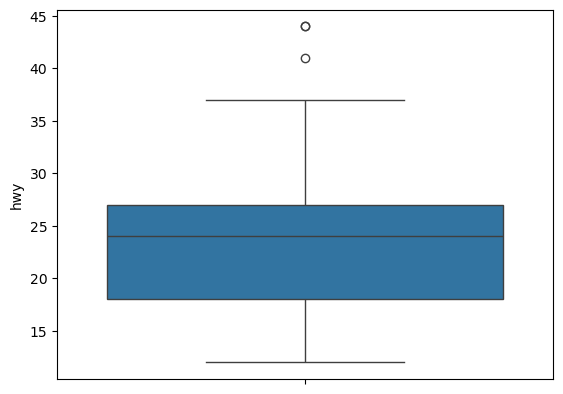

In [24]:
sns.boxplot(data=mpg, y='hwy')

<Axes: xlabel='displ', ylabel='hwy'>

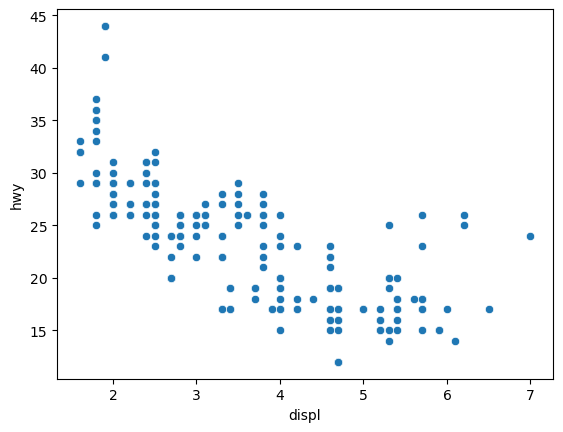

In [26]:
sns.scatterplot(data=mpg, x='displ', y='hwy')

[(3.0, 6.0)]

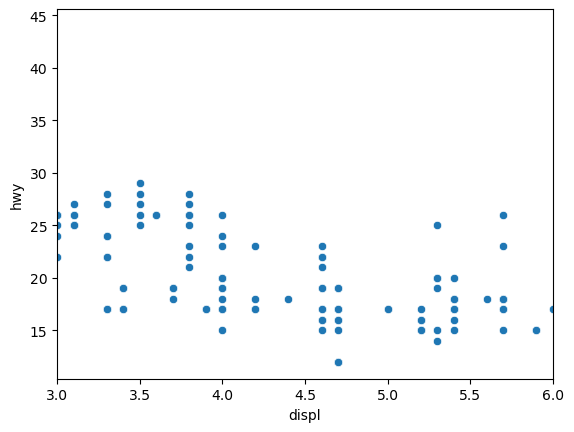

In [28]:
sns.scatterplot(data=mpg, x='displ', y='hwy').set(xlim=(3,6))

<Axes: xlabel='displ', ylabel='hwy'>

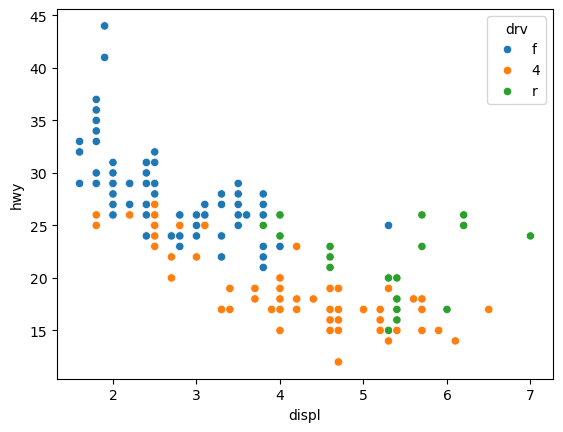

In [30]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')

In [32]:
economics = pd.read_csv('./data/economics.csv')
economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.000,12.6,4.5,2944
1,1967-08-01,509.8,198911.000,12.6,4.7,2945
2,1967-09-01,515.6,199113.000,11.9,4.6,2958
3,1967-10-01,512.2,199311.000,12.9,4.9,3143
4,1967-11-01,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504


In [34]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [36]:
economics.describe()

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,7626.325000,290290.750000,11.100000,9.100000,8685.500000
max,12193.800000,320402.295000,17.300000,25.200000,15352.000000


<Axes: xlabel='date', ylabel='unemploy'>

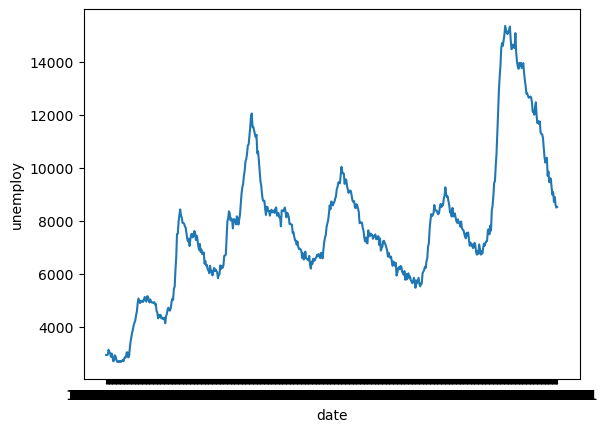

In [38]:
sns.lineplot(data=economics, x='date', y='unemploy')

In [40]:
economics['date2'] = pd.to_datetime(economics['date'])

In [42]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [45]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [47]:
economics['year'] = economics['date2'].dt.year

<Axes: xlabel='year', ylabel='unemploy'>

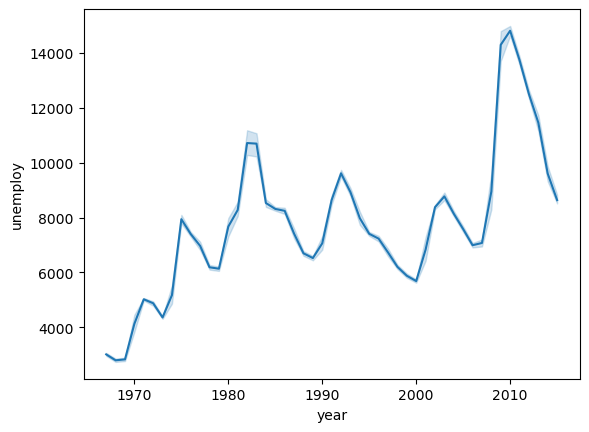

In [50]:
sns.lineplot(data=economics, x='year', y='unemploy')

<Axes: xlabel='drv', ylabel='hwy'>

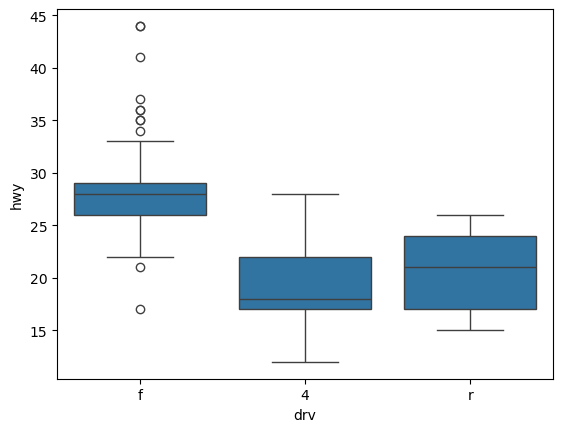

In [52]:
sns.boxplot(data=mpg, x='drv', y='hwy')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [197]:
raw_welfare = pd.read_spss('./data/Koweps_hpwc14_2019_beta2.sav')

In [4]:
raw_welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [198]:
welfare = raw_welfare.copy()

In [199]:
welfare.shape

(14418, 830)

In [200]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [201]:
welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [202]:
welfare = welfare.rename(
    columns = {'h14_g3' : 'sex',
               'h14_g4' : 'birth',
               'h14_g10' : 'marriage_type',
               'h14_g11' : 'religion',
               'p1402_8aq1' : 'income',
               'h14_eco9' : 'code_job',
               'h14_reg7' : 'code_region'})

In [203]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [204]:
welfare['sex'].dtypes

dtype('float64')

In [205]:
welfare['sex'].isna().sum()

np.int64(0)

In [206]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

In [207]:
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

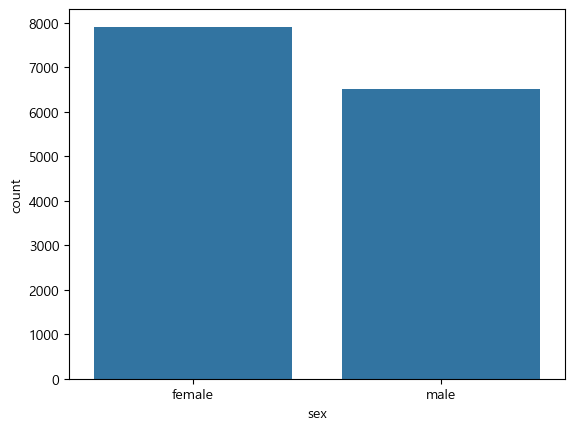

In [208]:
sns.countplot(data=welfare, x='sex')

In [68]:
welfare['income'].dtypes

dtype('float64')

In [69]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

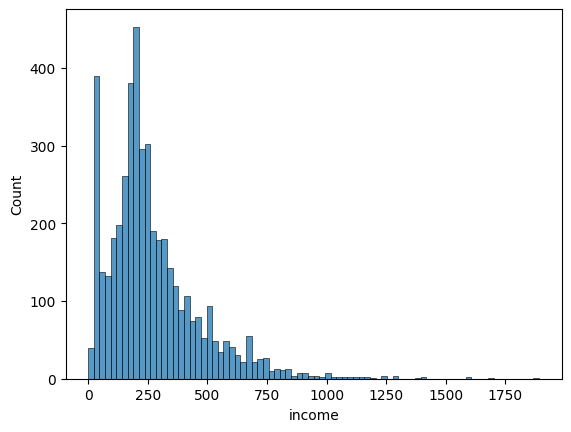

In [70]:
sns.histplot(data=welfare, x='income')

In [71]:
welfare['income'].isna().sum()

np.int64(9884)

In [72]:
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [73]:
welfare['income']

0          NaN
1          NaN
2        107.0
3        192.0
4          NaN
         ...  
14413      NaN
14414      NaN
14415      NaN
14416    200.0
14417      NaN
Name: income, Length: 14418, dtype: float64

In [74]:
sex_income = welfare.dropna(subset=['income']).groupby('sex', as_index=False).agg(mean_income = ('income', 'mean'))

In [76]:
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

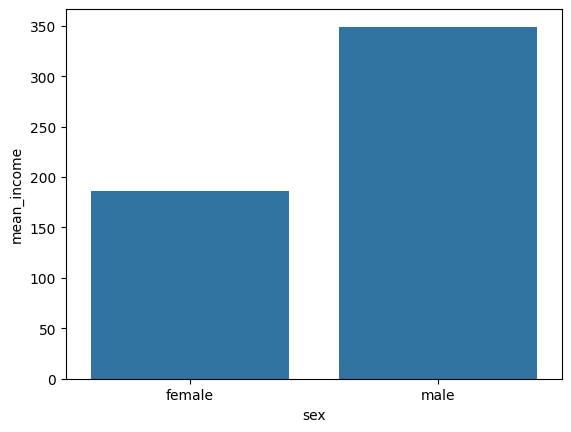

In [79]:
sns.barplot(data=sex_income, x='sex', y='mean_income')

In [81]:
welfare['birth'].dtypes

dtype('float64')

In [83]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [85]:
welfare.shape

(14418, 830)

<Axes: xlabel='birth', ylabel='Count'>

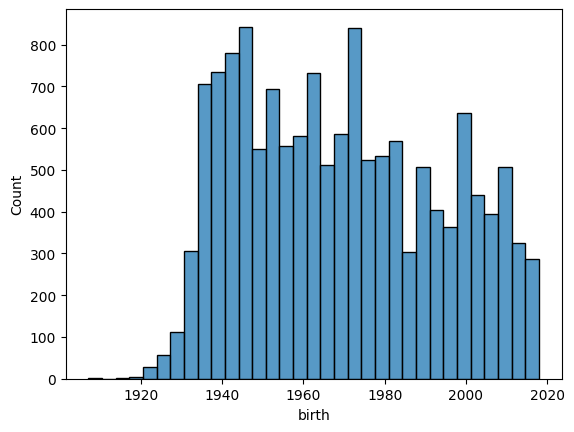

In [87]:
sns.histplot(data=welfare, x='birth')

In [89]:
welfare['birth'].isna().sum()

np.int64(0)

In [91]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)

In [94]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [96]:
age_income = welfare.dropna(subset=['income']).groupby('age').agg(mean_income=('income', 'mean'))

In [98]:
age_income

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471
...,...
88.0,27.000000
89.0,27.000000
90.0,27.000000


<Axes: xlabel='age', ylabel='mean_income'>

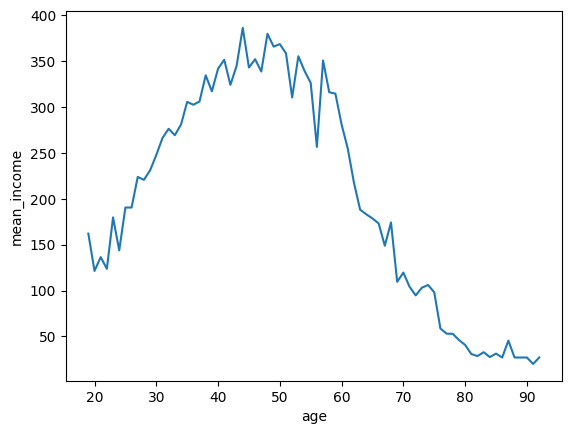

In [100]:
sns.lineplot(data=age_income, x='age', y='mean_income')

In [102]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [104]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young', 
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

In [106]:
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

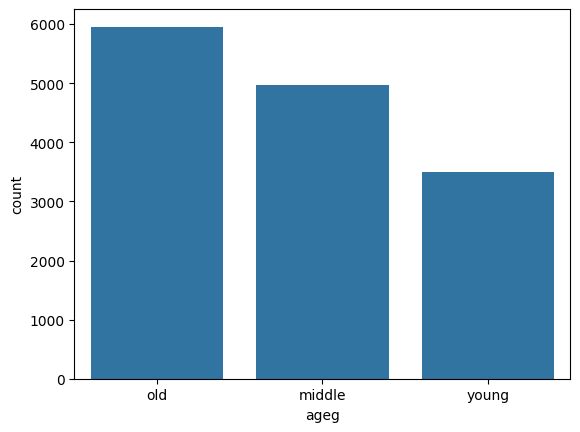

In [108]:
sns.countplot(data=welfare, x='ageg')

In [110]:
ageg_income = welfare.dropna(subset=['income']).groupby('ageg', as_index=False).agg(mean_income=('income', 'mean'))

<Axes: xlabel='ageg', ylabel='mean_income'>

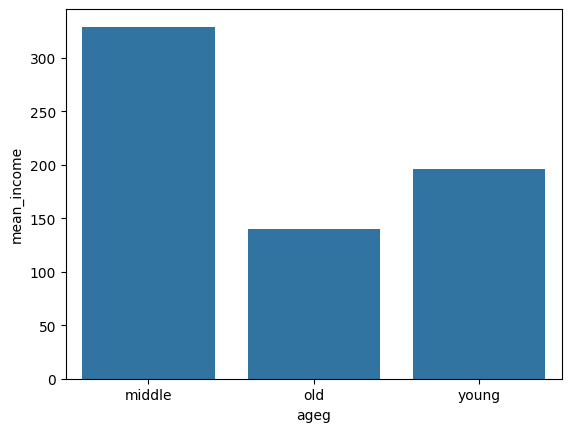

In [112]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

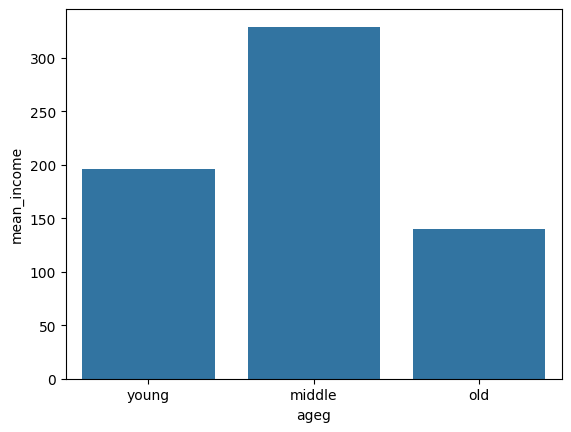

In [114]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old'])

In [116]:
sex_income = welfare.dropna(subset=['income']).groupby(['ageg', 'sex'], as_index=False).agg(mean_income=('income', 'mean'))

In [118]:
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

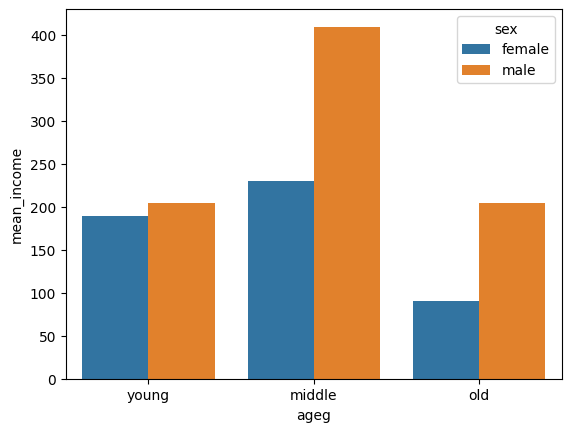

In [120]:
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex', order=['young', 'middle', 'old'])

In [122]:
sex_age = welfare.dropna(subset=['income']).groupby(['age', 'sex'], as_index=False).agg(mean_income=('income', 'mean'))

In [124]:
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<Axes: xlabel='age', ylabel='mean_income'>

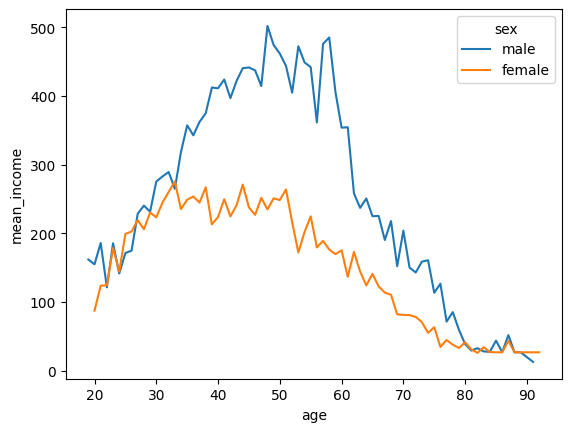

In [126]:
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

In [128]:
welfare['code_job'].dtypes

dtype('float64')

In [130]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
784.0      2
122.0      2
861.0      1
423.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [135]:
list_job = pd.read_excel('./data/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')

In [137]:
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [139]:
list_job.shape

(156, 2)

In [150]:
welfare = welfare.merge(list_job, how='left', on='code_job')

In [151]:
print(welfare.columns)

Index(['h14_id', 'h14_ind', 'h14_sn', 'h14_merkey', 'h_new', 'h14_cobf',
       'p14_wsc', 'p14_wsl', 'p14_wgc', 'p14_wgl',
       ...
       'h14_pers_income1', 'h14_pers_income2', 'h14_pers_income3',
       'h14_pers_income4', 'h14_pers_income5', 'age', 'ageg', 'job_x', 'job_y',
       'job'],
      dtype='object', length=835)


In [153]:
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [155]:
job_income = welfare.dropna(subset=['job', 'income']).groupby('job', as_index=False).agg(mean_income=('income', 'mean'))

In [157]:
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [159]:
top10 = job_income.sort_values('mean_income', ascending=False).head(10)

In [161]:
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [163]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

<Axes: xlabel='mean_income', ylabel='job'>

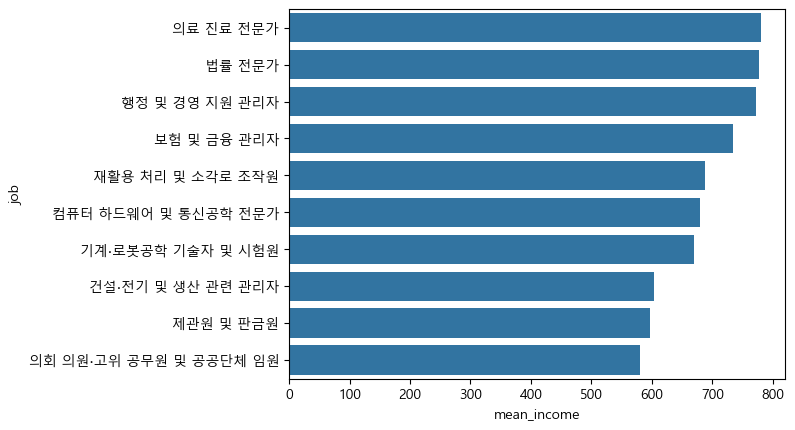

In [165]:
sns.barplot(data=top10, y='job', x='mean_income')

In [168]:
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
126,채굴 및 토목 관련 기능 종사자,140.000000
139,학예사∙사서 및 기록물 관리사,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

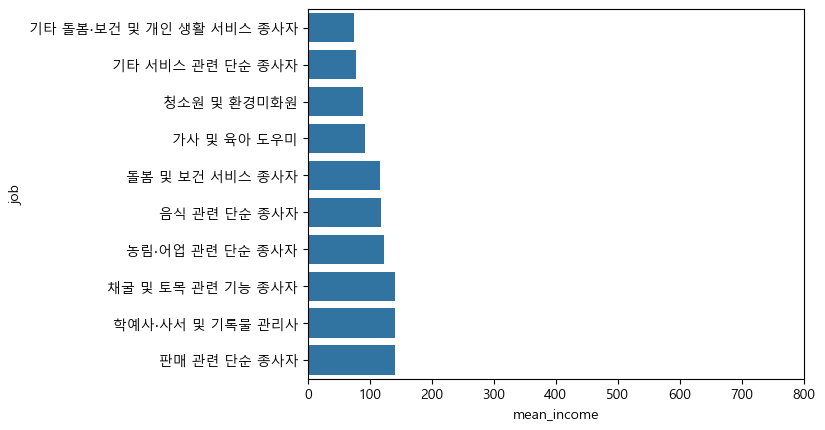

In [170]:
sns.barplot(data=bottom10, y='job', x='mean_income').set(xlim=(0, 800))

In [ ]:
job_male = welfare.dropna(subset=['job'])\
                  .query('sex == "male"')\
                  .groupby('job', as_index=False)\
                  .agg(n = ('job', 'count'))\
                  .sort_values('n', ascending=False)\
                  .head(10)

In [175]:
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [177]:
job_female = welfare.dropna(subset=['job'])\
                    .query('sex == "female"')\
                    .groupby('job', as_index=False)\
                    .agg(n = ('job', 'count'))\
                    .sort_values('n', ascending=False)\
                    .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

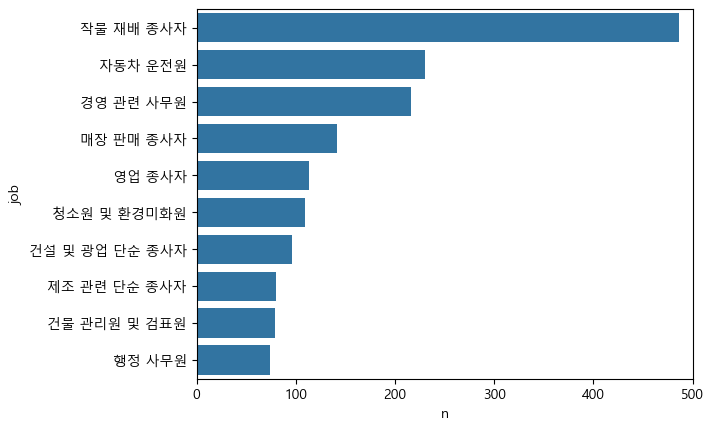

In [179]:
sns.barplot(data=job_male, y='job', x='n').set(xlim=(0,500))

[(0.0, 500.0)]

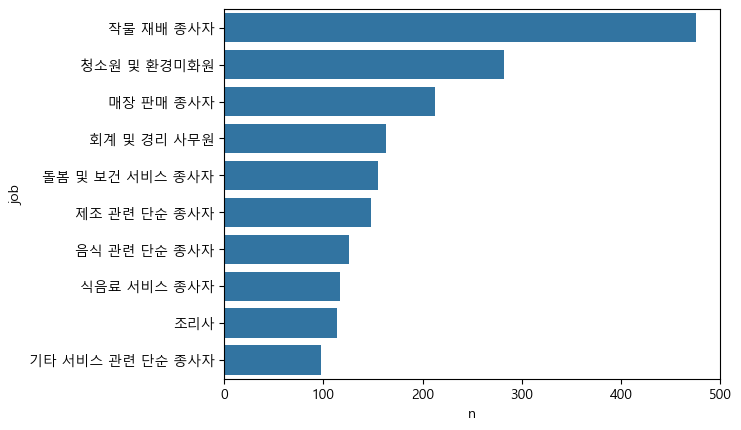

In [181]:
sns.barplot(data=job_female, y='job', x='n').set(xlim=(0,500))

In [209]:
welfare['religion'].dtypes

dtype('float64')

In [210]:
welfare['religion'].value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [211]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

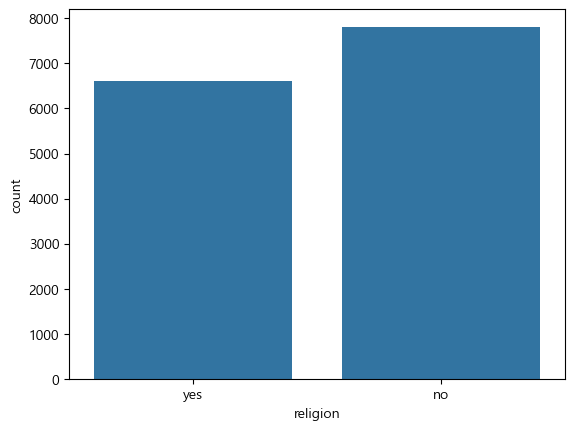

In [213]:
sns.countplot(data=welfare, x='religion')

In [215]:
welfare['marriage_type'].dtypes

dtype('float64')

In [217]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [219]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage', np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [221]:
n_divorce = welfare.groupby('marriage', as_index=False)\
                   .agg(n=('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

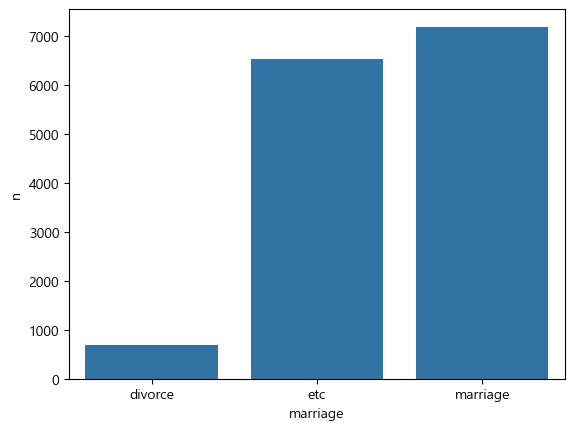

In [223]:
sns.barplot(data=n_divorce, x='marriage', y='n')

In [226]:
rel_div = welfare.query('marriage != "etc"')\
                 .groupby('religion', as_index=False)\
                 ['marriage']\
                 .value_counts(normalize=True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531
